#COVID-19 Recognition on Medical Images via Convolutional Neural Networks (CNN)

Author: Mafizur Rahman

Date: 04.21.2024

Copyright: ©Mafizur Rahman. All rights reserved.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
# import numpy as np

#Data Loading

In [4]:
train_x= np.load('/content/drive/MyDrive/covidNetDataset/x_train.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
train_y=np.load('/content/drive/MyDrive/covidNetDataset/y_train.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
test_x=np.load('/content/drive/MyDrive/covidNetDataset/x_test.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
test_y=np.load('/content/drive/MyDrive/covidNetDataset/y_test.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')
classes = {0: "Negative", 1: "Positive"}
# classes = {0: "Negative", 1: "Positive"}



In [5]:

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(train_y, num_classes=2)
y_test = to_categorical(test_y, num_classes=2)

# Normalize the image data to 0-1
x_train = train_x.astype('float32') / 255.0
x_test = test_x.astype('float32') / 255.0

In [6]:
# Set hyperparameters
batch_size = 32
epochs = 10
learning_rate = 0.0001
num_classes = 2

#Building Model

In [7]:

models = []
# CNN structure 1
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Conv2D(32, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))
models.append(model_1)

# CNN structure 2
model_2 = Sequential()
model_2.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Conv2D(16, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Conv2D(32, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))
models.append(model_2)

# CNN structure 3
model_3 = Sequential()
model_3.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Conv2D(16, (3, 3), padding='same'))
model_3.add(Conv2D(32, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))
models.append(model_3)

In [8]:
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0         
                                                        

#Training and Testing Model

Training model 1
Epoch 1/10
10/10 [==============================] - 25s 2s/step - loss: 0.6182 - accuracy: 0.8167 - val_loss: 0.6640 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 22s 2s/step - loss: 0.5210 - accuracy: 0.8333 - val_loss: 0.4268 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 23s 2s/step - loss: 0.4747 - accuracy: 0.8333 - val_loss: 0.4336 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 23s 2s/step - loss: 0.4457 - accuracy: 0.8333 - val_loss: 0.4780 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 21s 2s/step - loss: 0.4095 - accuracy: 0.8333 - val_loss: 0.3920 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 22s 2s/step - loss: 0.3536 - accuracy: 0.8333 - val_loss: 0.3507 - val_accuracy: 0.8400
Epoch 7/10
10/10 [==============================] - 21s 2s/step - loss: 0.2913 - accuracy: 0.8300 - val_loss: 0.3065 - val_accuracy: 0.8600
Epo

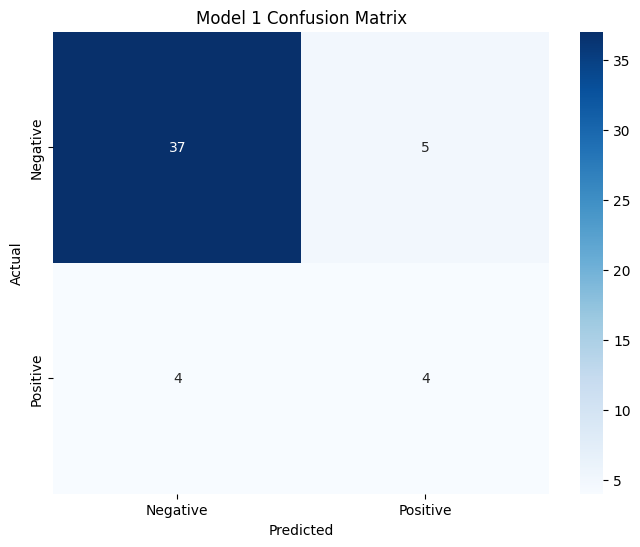

Classification Report for Model 1:
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89        42
    Positive       0.44      0.50      0.47         8

    accuracy                           0.82        50
   macro avg       0.67      0.69      0.68        50
weighted avg       0.83      0.82      0.82        50

Model 1 Precision: 0.67, Recall: 0.69, F1-Score: 0.68
Training model 2
Epoch 1/10
10/10 [==============================] - 33s 3s/step - loss: 0.6423 - accuracy: 0.8033 - val_loss: 0.4342 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 31s 3s/step - loss: 0.5584 - accuracy: 0.8333 - val_loss: 0.5277 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 34s 3s/step - loss: 0.4728 - accuracy: 0.8333 - val_loss: 0.4402 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 31s 3s/step - loss: 0.4431 - accuracy: 0.8333 - val_loss: 0.4279 - val_accuracy: 0.8400
Epoch 5

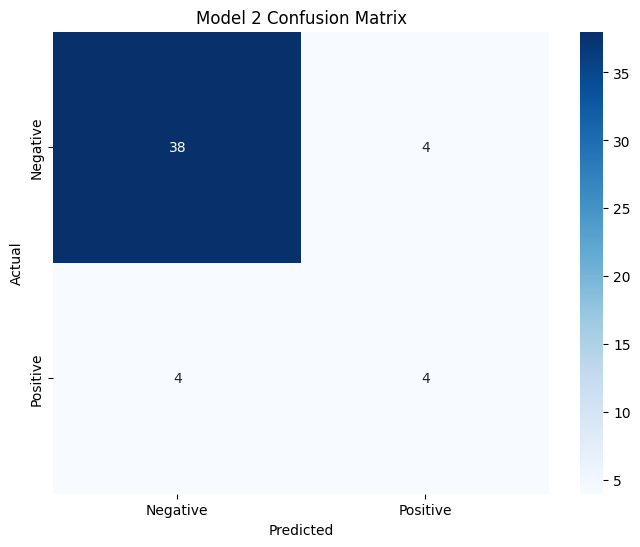

Classification Report for Model 2:
              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90        42
    Positive       0.50      0.50      0.50         8

    accuracy                           0.84        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.84      0.84      0.84        50

Model 2 Precision: 0.70, Recall: 0.70, F1-Score: 0.70
Training model 3
Epoch 1/10
10/10 [==============================] - 27s 2s/step - loss: 0.5216 - accuracy: 0.8067 - val_loss: 0.4329 - val_accuracy: 0.8400
Epoch 2/10
10/10 [==============================] - 24s 2s/step - loss: 0.4410 - accuracy: 0.8333 - val_loss: 0.4240 - val_accuracy: 0.8400
Epoch 3/10
10/10 [==============================] - 25s 3s/step - loss: 0.3946 - accuracy: 0.8333 - val_loss: 0.3536 - val_accuracy: 0.8400
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.2770 - accuracy: 0.8500 - val_loss: 0.2835 - val_accuracy: 0.8200
Epoch 5

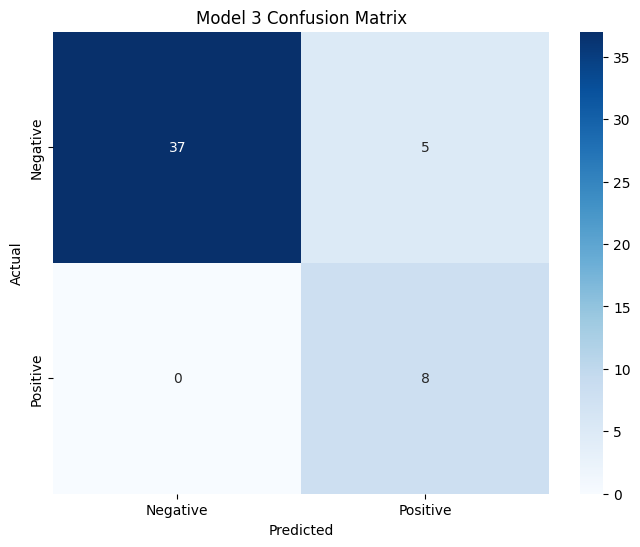

Classification Report for Model 3:
              precision    recall  f1-score   support

    Negative       1.00      0.88      0.94        42
    Positive       0.62      1.00      0.76         8

    accuracy                           0.90        50
   macro avg       0.81      0.94      0.85        50
weighted avg       0.94      0.90      0.91        50

Model 3 Precision: 0.81, Recall: 0.94, F1-Score: 0.85


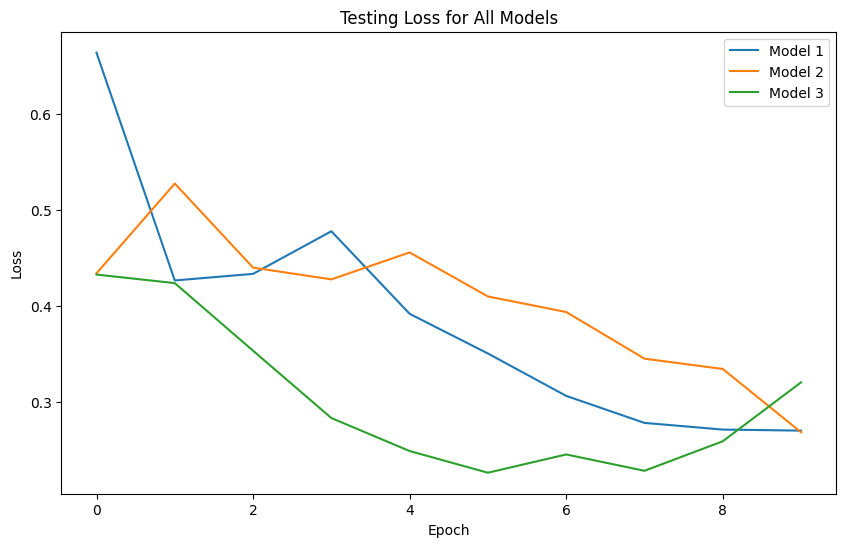

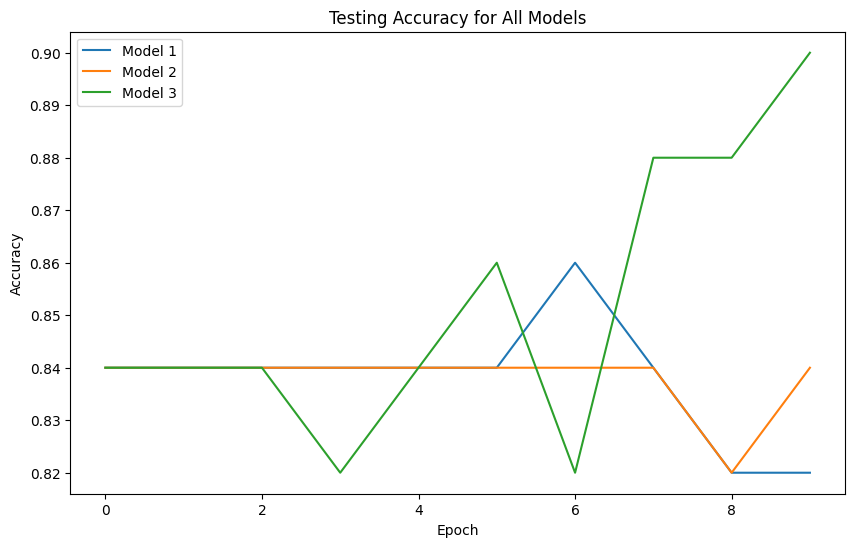

In [9]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []

# Initialize lists to store testing loss and accuracy for each model
test_losses = []
test_accuracies = []

for i, model in enumerate(models):
    # Compile the model
    opt = Adam(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    print(f"Training model {i+1}")
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

    # Store training loss and accuracy
    train_losses.append(history.history['loss'])
    train_accuracies.append(history.history['accuracy'])

    # Print training accuracy and loss
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    print(f"Model {i+1} Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f"Model {i+1} Test loss:", score[0])
    print(f"Model {i+1} Test accuracy:", score[1])
    test_losses.append(history.history['val_loss'])  # Append testing loss
    test_accuracies.append(history.history['val_accuracy'])  # Append testing accuracy

    # Predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Model {i+1} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    print(f"Classification Report for Model {i+1}:")
    report = classification_report(y_true, y_pred_classes, target_names=['Negative', 'Positive'], output_dict=True)
    print(classification_report(y_true, y_pred_classes, target_names=['Negative', 'Positive']))

    # Display Precision, Recall, F1-Score
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    print(f"Model {i+1} Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")

# Plotting testing loss for all models
plt.figure(figsize=(10, 6))
for i, loss in enumerate(test_losses):
    plt.plot(loss, label=f'Model {i+1}')
plt.title('Testing Loss for All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting testing accuracy for all models
plt.figure(figsize=(10, 6))
for i, accuracy in enumerate(test_accuracies):
    plt.plot(accuracy, label=f'Model {i+1}')
plt.title('Testing Accuracy for All Models')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



#K Fold Validation

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# number of folds
num_folds = 3

# Initialize lists to store performance metrics for each fold
val_loss_histories = []
val_accuracy_histories = []

# Define K-fold cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(kfold.split(x_train)):
    print(f'Fold {fold + 1}/{num_folds}:')

    # Get training and validation data for this fold
    x_train_fold, x_val_fold = x_train[train_indices], x_train[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]

    # Train and evaluate each model
    fold_val_loss = []
    fold_val_accuracy = []
    for model_index, model in enumerate(models):
        print(f'Training model {model_index + 1}...')

        # Train the model
        history = model.fit(x_train_fold, y_train_fold, batch_size=batch_size, epochs=epochs, validation_data=(x_val_fold, y_val_fold), verbose=0)

        # Evaluate the model on the validation data
        val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
        fold_val_loss.append(val_loss)
        fold_val_accuracy.append(val_accuracy)

        print(f'Model {model_index + 1} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

    # Store performance metrics for this fold
    val_loss_histories.append(fold_val_loss)
    val_accuracy_histories.append(fold_val_accuracy)

# Calculate average performance metrics across all folds
avg_val_loss = np.mean(val_loss_histories, axis=0)
avg_val_accuracy = np.mean(val_accuracy_histories, axis=0)

print('\nAverage Performance Across All Folds:')
for model_index, (avg_loss, avg_accuracy) in enumerate(zip(avg_val_loss, avg_val_accuracy)):
    print(f'Model {model_index + 1} - Average Validation Loss: {avg_loss}, Average Validation Accuracy: {avg_accuracy}')



Fold 1/3:
Training model 1...
Model 1 - Validation Loss: 0.05902145802974701, Validation Accuracy: 0.9900000095367432
Training model 2...
Model 2 - Validation Loss: 0.03355155885219574, Validation Accuracy: 0.9800000190734863
Training model 3...
Model 3 - Validation Loss: 0.016235072165727615, Validation Accuracy: 0.9900000095367432
Fold 2/3:
Training model 1...
Model 1 - Validation Loss: 0.042736802250146866, Validation Accuracy: 0.9900000095367432
Training model 2...
Model 2 - Validation Loss: 0.025713756680488586, Validation Accuracy: 0.9900000095367432
Training model 3...
Model 3 - Validation Loss: 0.008192263543605804, Validation Accuracy: 1.0
Fold 3/3:
Training model 1...
Model 1 - Validation Loss: 0.04948340728878975, Validation Accuracy: 0.9800000190734863
Training model 2...
Model 2 - Validation Loss: 0.010270931757986546, Validation Accuracy: 0.9900000095367432
Training model 3...
Model 3 - Validation Loss: 0.014973003417253494, Validation Accuracy: 1.0

Average Performance A

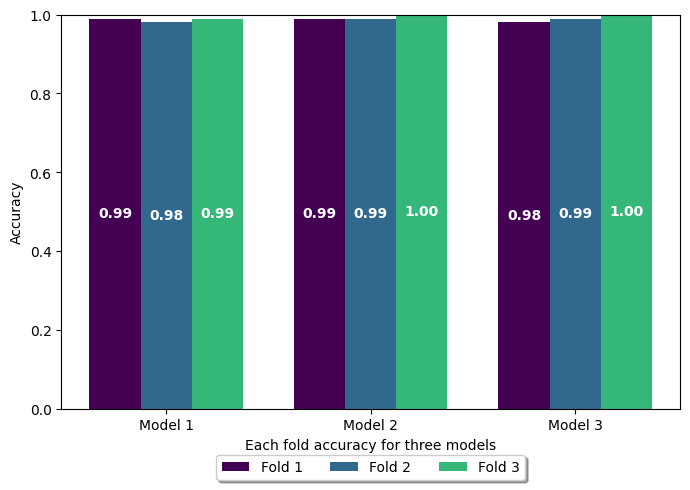

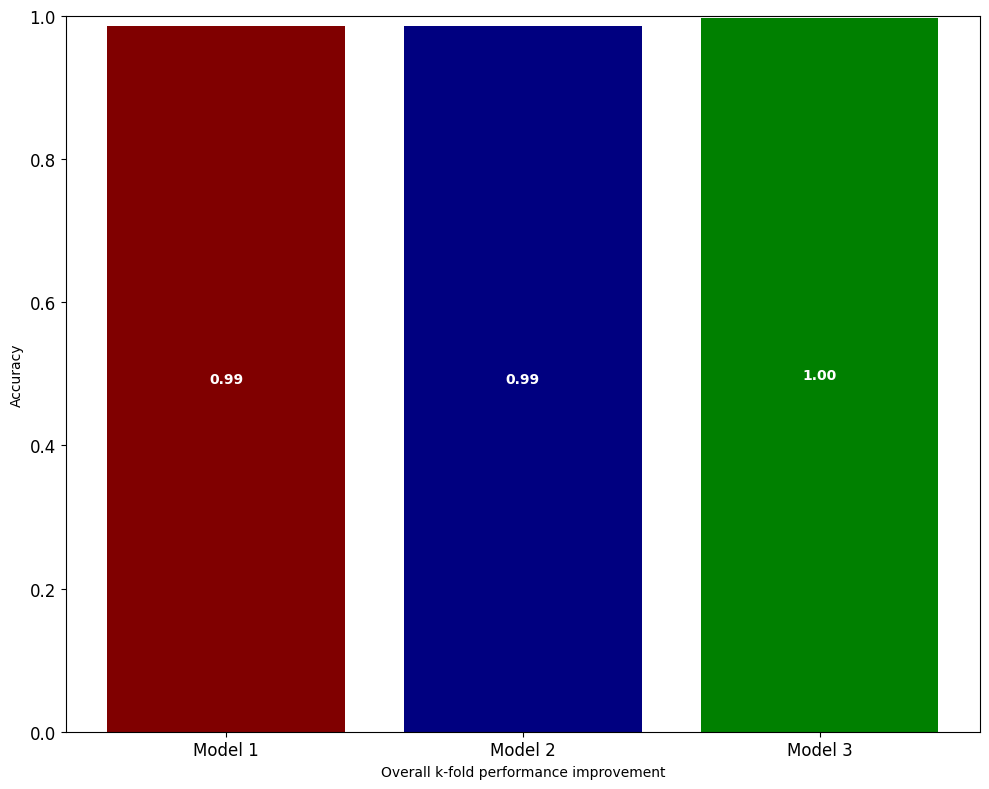

In [44]:
plt.figure(figsize=(7, 5))

model_labels = [f'Model {i + 1}' for i in range(len(models))]
bar_width = 0.25  # Reduce bar width
index = np.arange(len(models))

for fold in range(num_folds):
    fold_accuracies = [fold_acc[fold] for fold_acc in val_accuracy_histories]
    plt.bar(index + fold * bar_width, fold_accuracies, bar_width, label=f'Fold {fold + 1}', color=plt.cm.viridis(fold / num_folds))
    for i, acc in enumerate(fold_accuracies):
        plt.text(index[i] + fold * bar_width, acc / 2, f"{acc:.2f}", ha='center', va='center', color='white', fontweight='bold')


plt.xlabel('Each fold accuracy for three models')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width * (num_folds - 1) / 2, model_labels)  # Adjust xticks position


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=num_folds)

plt.ylim(0, 1)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
bars = plt.bar(model_labels[:num_folds], avg_val_accuracy, color=['maroon', 'navy', 'green'])

# Add data values inside the bars
for bar, acc in zip(bars, avg_val_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{acc:.2f}", ha='center', va='center', color='white', fontweight='bold')

# Customize plot appearance
plt.xlabel('Overall k-fold performance improvement')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
#Prediction Checking


import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

for i, model in enumerate(models):
    # Compile the model with the Adam optimizer
    opt = Adam(learning_rate=0.0001)  # Replace with the correct learning rate if different
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

    # Evaluate the model
    score = model.evaluate(x_test, y_test, verbose=0)
    
    # Make predictions
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Print model number, test loss, and test accuracy
    print(f"Model: {i+1}", " Prediction Result")

    # Print actual and predicted results
    print(true_classes.tolist())
    print(predicted_classes.tolist())
